In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('movie_metadata.csv')
df = data.copy()

In [3]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
df.shape

(5043, 28)

# <font color='red'>Separating the data</font>

In [5]:
# Separating into dependent & independent features

y = df.loc[:, 'imdb_score']
x = df.loc[:, df.columns != 'imdb_score']

In [6]:
# getting all the numerical & categorical column names

numerical_features = x.select_dtypes(exclude=['object']).columns
categorical_features = x.select_dtypes(include=['object']).columns

# <font color='red'>Handle Numerical features</font>

### <font color='green'>Handle missing values</font>

In [7]:
# Check for missing values in all the numerical columns

print(x[numerical_features].isnull().mean()*100)

num_critic_for_reviews        0.991473
duration                      0.297442
director_facebook_likes       2.062265
actor_3_facebook_likes        0.456078
actor_1_facebook_likes        0.138806
gross                        17.529248
num_voted_users               0.000000
cast_total_facebook_likes     0.000000
facenumber_in_poster          0.257783
num_user_for_reviews          0.416419
budget                        9.756098
title_year                    2.141582
actor_2_facebook_likes        0.257783
aspect_ratio                  6.523895
movie_facebook_likes          0.000000
dtype: float64


In [8]:
# Imputing median in place of all the missing numerical value

for cols in numerical_features:
    x[cols].fillna(x[cols].median(), inplace=True)

In [9]:
x[numerical_features].isnull().mean()

num_critic_for_reviews       0.0
duration                     0.0
director_facebook_likes      0.0
actor_3_facebook_likes       0.0
actor_1_facebook_likes       0.0
gross                        0.0
num_voted_users              0.0
cast_total_facebook_likes    0.0
facenumber_in_poster         0.0
num_user_for_reviews         0.0
budget                       0.0
title_year                   0.0
actor_2_facebook_likes       0.0
aspect_ratio                 0.0
movie_facebook_likes         0.0
dtype: float64

### <font color='green'>Handle outliers</font>

In [10]:
x_numeric = x[numerical_features].copy()
x_numeric.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,2.35,164000
4,110.0,103.0,131.0,371.5,131.0,25517500.0,8,143,0.0,156.0,20000000.0,2005.0,12.0,2.35,0


In [11]:
numerical_features

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

<AxesSubplot:>

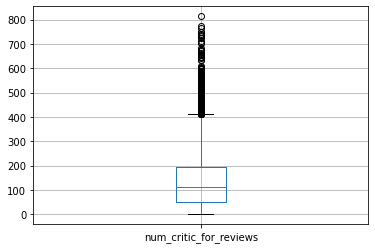

In [12]:
x.boxplot('num_critic_for_reviews')

In [13]:
def num_outlier(dataframe, columns):
    '''
    This method removes all the values outside of 3rd standard deviation
    
    Inputs
       dataframe: dataset to handle
       columns: all the numerical columns in which operation to perform.
       
    Return
        return type is None
    '''
    for item in columns:
        upper = dataframe[item].mean()+3*dataframe[item].std()
        lower = dataframe[item].mean()-3*dataframe[item].std()
        x[item] = np.where(dataframe[item] > upper, upper, dataframe[item])
        x[item] = np.where(dataframe[item] < lower, lower, dataframe[item])

In [14]:
num_outlier(x_numeric, numerical_features)

<AxesSubplot:>

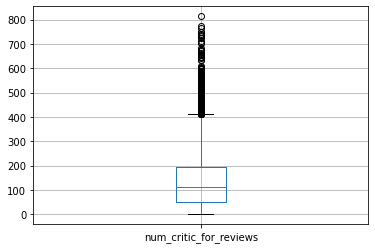

In [15]:
x.boxplot('num_critic_for_reviews')

In [16]:
x_numeric.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,2.35,164000
4,110.0,103.0,131.0,371.5,131.0,25517500.0,8,143,0.0,156.0,20000000.0,2005.0,12.0,2.35,0


# <font color='red'>Handle Categorical features</font>

### <font color='green'>Handle missing value</font>

In [17]:
x_categorical = x[categorical_features].copy()
x_categorical.head()

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
0,Color,James Cameron,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,Wes Studi,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,PG-13
1,Color,Gore Verbinski,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,PG-13
2,Color,Sam Mendes,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,PG-13
3,Color,Christopher Nolan,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,PG-13
4,NaN,Doug Walker,Rob Walker,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN


In [18]:
# Checking for categorical missing columns

x_categorical.isnull().mean() * 100

color              0.376760
director_name      2.062265
actor_2_name       0.257783
genres             0.000000
actor_1_name       0.138806
movie_title        0.000000
actor_3_name       0.456078
plot_keywords      3.033908
movie_imdb_link    0.000000
language           0.237954
country            0.099147
content_rating     6.008328
dtype: float64

In [19]:
# Imputing each missing  value with the maximum occuring category

def cat_missing(dataframe, columns):
    '''
    This method impute mode of each categorical column
    
    Input
       dataframe: dataset on which operation to apply
       column: name of all the categorical columns
       
    Return
       it returns None
    '''
    for cols in columns:
        dataframe[cols].fillna('Missing', inplace=True)

In [20]:
cat_missing(x_categorical, x_categorical.columns)

In [21]:
x_categorical.isnull().mean()

color              0.0
director_name      0.0
actor_2_name       0.0
genres             0.0
actor_1_name       0.0
movie_title        0.0
actor_3_name       0.0
plot_keywords      0.0
movie_imdb_link    0.0
language           0.0
country            0.0
content_rating     0.0
dtype: float64

In [22]:
categorical_features

Index(['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name',
       'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link',
       'language', 'country', 'content_rating'],
      dtype='object')

### <font color='green'>Handle genres column</font>

In [23]:
x_categorical.genres.unique()[:5]

array(['Action|Adventure|Fantasy|Sci-Fi', 'Action|Adventure|Fantasy',
       'Action|Adventure|Thriller', 'Action|Thriller', 'Documentary'],
      dtype=object)

In [24]:
# As highest genre in any film is 8 so we'll convert Genres to 8 categories features

df_genres = pd.DataFrame(x_categorical['genres'])
df_genres = pd.DataFrame(df_genres.genres.str.split('|').tolist(),columns = ["Genre_"+str(i) for i in  range(0,8)])
df_genres.head(4)

,Genre_0,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7
0,Action,Adventure,Fantasy,Sci-Fi,None,None,None,None
1,Action,Adventure,Fantasy,None,None,None,None,None
2,Action,Adventure,Thriller,None,None,None,None,None
3,Action,Thriller,None,None,None,None,None,None


In [25]:
# Check all the missing value of each column of the df_genres

for col in df_genres.columns:
    print(col, df_genres[col].isnull().mean()*100)

Genre_0 0.0
Genre_1 12.55205234979179
Genre_2 39.42097957564942
Genre_3 71.70335117985326
Genre_4 91.15605790204243
Genre_5 98.07654174102717
Genre_6 99.56375173507833
Genre_7 99.9206821336506


In [26]:
# As Genre_[4,5,6,7] has missing value more then 90% so we'll remove all those

df_genres.drop(['Genre_4', 'Genre_5', 'Genre_6', 'Genre_7'], axis=1, inplace=True)

In [27]:
df_genres.head(1)

,Genre_0,Genre_1,Genre_2,Genre_3
0,Action,Adventure,Fantasy,Sci-Fi


In [28]:
# replace all NaN values as MISSING

df_genres.fillna('Missing', axis=1, inplace=True)

In [29]:
# Impute Missing in all the columns

print(df_genres.Genre_3.value_counts())

Missing     3616
Thriller     481
Romance      182
Family       136
Sci-Fi       120
Fantasy      104
Mystery       71
War           64
Drama         50
Sport         44
History       42
Musical       31
Music         26
Western       22
Comedy        22
Horror        18
Crime         13
News           1
Name: Genre_3, dtype: int64


In [30]:
# We'll remove the genres column

x_categorical.drop('genres', axis=1, inplace=True)

### <font color='green'>Handle PlotKeywords</font>

In [31]:
df_plot_keyword = pd.DataFrame(x_categorical['plot_keywords'])
df_plot_keyword = pd.DataFrame(df_plot_keyword.plot_keywords.str.split('|').tolist(),columns = ["PlotKeywords_"+str(i) for i in  range(0,5)])
df_plot_keyword.head(4)

,PlotKeywords_0,PlotKeywords_1,PlotKeywords_2,PlotKeywords_3,PlotKeywords_4
0,avatar,future,marine,native,paraplegic
1,goddess,marriage ceremony,marriage proposal,pirate,singapore
2,bomb,espionage,sequel,spy,terrorist
3,deception,imprisonment,lawlessness,police officer,terrorist plot


In [32]:
for col in df_plot_keyword.columns:
    print(col, df_plot_keyword[col].isnull().mean()*100)

PlotKeywords_0 0.0
PlotKeywords_1 3.846916517945667
PlotKeywords_2 4.461629982153481
PlotKeywords_3 5.036684513186596
PlotKeywords_4 5.790204243505849


In [33]:
df_plot_keyword.fillna('Missing', axis=1, inplace=True)

In [34]:
for col in df_plot_keyword.columns:
    print(col, df_plot_keyword[col].isnull().mean()*100)

PlotKeywords_0 0.0
PlotKeywords_1 0.0
PlotKeywords_2 0.0
PlotKeywords_3 0.0
PlotKeywords_4 0.0


In [35]:
x_categorical.drop('plot_keywords', axis=1, inplace=True)

In [36]:
x_categorical.content_rating.value_counts()

R            2118
PG-13        1461
PG            701
Missing       303
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
TV-MA          20
X              13
TV-PG          13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y            1
TV-Y7           1
Name: content_rating, dtype: int64

In [37]:
x_categorical.head(1)

,color,director_name,actor_2_name,actor_1_name,movie_title,actor_3_name,movie_imdb_link,language,country,content_rating
0,Color,James Cameron,Joel David Moore,CCH Pounder,Avatar,Wes Studi,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,PG-13


### <font color='green'>Handling language column</font>

In [38]:
x_categorical.language.value_counts()[:7]

English     4704
French        73
Spanish       40
Hindi         28
Mandarin      26
German        19
Japanese      18
Name: language, dtype: int64

In [39]:
x_categorical.loc[x_categorical[
    (x_categorical["language"] != "English")&
    (x_categorical["language"] != "French")&
    (x_categorical["language"] != "Spanish")&
    (x_categorical["language"] != "Hindi")&
    (x_categorical["language"] != "Mandarin")&
    (x_categorical["language"] != "Japanese")
                               ].index,"language"] = "Other"

In [40]:
x_categorical.language.value_counts()

English     4704
Other        154
French        73
Spanish       40
Hindi         28
Mandarin      26
Japanese      18
Name: language, dtype: int64

In [41]:
# drop imdb link as it'll not play any part in finding the IMDB score

x_categorical.drop('movie_imdb_link', axis=1, inplace=True)

### <font color='green'>Handling Country column</font>

In [42]:
x_categorical.country.value_counts()[:5]

USA        3807
UK          448
France      154
Canada      126
Germany      97
Name: country, dtype: int64

In [43]:
x_categorical.loc[x_categorical[
    (x_categorical["country"] != "USA")&
    (x_categorical["country"] != "UK")&
    (x_categorical["country"] != "France")&
    (x_categorical["country"] != "Canada")&
    (x_categorical["country"] != "Germany")
                               ].index,"country"] = "Other"

In [44]:
x_categorical.country.value_counts()

USA        3807
UK          448
Other       411
France      154
Canada      126
Germany      97
Name: country, dtype: int64

### <font color='green'>Handling director name</font>

In [45]:
x_categorical.head(1)

,color,director_name,actor_2_name,actor_1_name,movie_title,actor_3_name,language,country,content_rating
0,Color,James Cameron,Joel David Moore,CCH Pounder,Avatar,Wes Studi,English,USA,PG-13


In [46]:
def custom_onehot_encoder(dataframe, column_name, top10):
    '''
    This method encodes the top 10 feature of the column & rest features are ignored
    
    Input
       dataframe: dataset on which work to perform
       column_name: name of the category column on which one-hot-encoding is to perform
       top10: top 10 feature name of the column
       
    Return
       it return encoded dataframe
    '''
    for feature in top10:
        dataframe[column_name+'_'+feature] = np.where(dataframe[column_name]==feature, 1, 0)
    return dataframe

In [47]:
top10 = x_categorical['director_name'].value_counts()[:10].index
dataframe = x_categorical.copy()
d = custom_onehot_encoder(dataframe=dataframe, column_name='director_name', top10=top10).head(1)
d.drop('director_name', axis=1).head(1)


,color,actor_2_name,actor_1_name,movie_title,actor_3_name,language,country,content_rating,director_name_Missing,director_name_Steven Spielberg,director_name_Woody Allen,director_name_Clint Eastwood,director_name_Martin Scorsese,director_name_Ridley Scott,director_name_Steven Soderbergh,director_name_Tim Burton,director_name_Spike Lee,director_name_Renny Harlin
0,Color,Joel David Moore,CCH Pounder,Avatar,Wes Studi,English,USA,PG-13,0,0,0,0,0,0,0,0,0,0


In [48]:
dataframe = x_categorical.copy()
for cols in ['director_name', 'movie_title', 'actor_1_name', 'actor_2_name', 'actor_3_name']:
    top10 = x_categorical[cols].value_counts()[:10].index
    dataframe = custom_onehot_encoder(dataframe=dataframe, column_name=cols, top10=top10)
    dataframe.drop(cols, axis=1, inplace=True)

In [49]:
x_categorical = dataframe.copy()
x_categorical.head()

,color,language,country,content_rating,director_name_Missing,director_name_Steven Spielberg,director_name_Woody Allen,director_name_Clint Eastwood,director_name_Martin Scorsese,director_name_Ridley Scott,...,actor_3_name_Missing,actor_3_name_John Heard,actor_3_name_Ben Mendelsohn,actor_3_name_Steve Coogan,actor_3_name_Lois Maxwell,actor_3_name_Robert Duvall,actor_3_name_Sam Shepard,actor_3_name_Kirsten Dunst,actor_3_name_Stephen Root,actor_3_name_Anne Hathaway
0,Color,English,USA,PG-13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Color,English,USA,PG-13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Color,English,UK,PG-13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Color,English,USA,PG-13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Missing,Other,Other,Missing,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### <font color='green'>Concate all the categorical dataframes</font>

In [50]:
x_categorical = pd.concat([x_categorical, df_genres, df_plot_keyword], axis=1)
x_categorical.head()

,color,language,country,content_rating,director_name_Missing,director_name_Steven Spielberg,director_name_Woody Allen,director_name_Clint Eastwood,director_name_Martin Scorsese,director_name_Ridley Scott,...,actor_3_name_Anne Hathaway,Genre_0,Genre_1,Genre_2,Genre_3,PlotKeywords_0,PlotKeywords_1,PlotKeywords_2,PlotKeywords_3,PlotKeywords_4
0,Color,English,USA,PG-13,0,0,0,0,0,0,...,0,Action,Adventure,Fantasy,Sci-Fi,avatar,future,marine,native,paraplegic
1,Color,English,USA,PG-13,0,0,0,0,0,0,...,0,Action,Adventure,Fantasy,Missing,goddess,marriage ceremony,marriage proposal,pirate,singapore
2,Color,English,UK,PG-13,0,0,0,0,0,0,...,0,Action,Adventure,Thriller,Missing,bomb,espionage,sequel,spy,terrorist
3,Color,English,USA,PG-13,0,0,0,0,0,0,...,0,Action,Thriller,Missing,Missing,deception,imprisonment,lawlessness,police officer,terrorist plot
4,Missing,Other,Other,Missing,0,0,0,0,0,0,...,0,Documentary,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing


### <font color='green'>Label encode remaining column</font>

In [51]:
from sklearn.preprocessing import LabelEncoder
abc  = x_categorical[[
 'color',
 'language',
 'country',
 'content_rating',
 'Genre_0',
 'Genre_1',
 'Genre_2',
 'Genre_3',
 'PlotKeywords_0',
 'PlotKeywords_1',
 'PlotKeywords_2',
 'PlotKeywords_3',
 'PlotKeywords_4']].apply(LabelEncoder().fit_transform)

In [52]:
x_categorical[[
 'color',
 'language',
 'country',
 'content_rating',
 'Genre_0',
 'Genre_1',
 'Genre_2',
 'Genre_3',
 'PlotKeywords_0',
 'PlotKeywords_1',
 'PlotKeywords_2',
 'PlotKeywords_3',
 'PlotKeywords_4']] = abc

In [53]:
x_categorical.head()

,color,language,country,content_rating,director_name_Missing,director_name_Steven Spielberg,director_name_Woody Allen,director_name_Clint Eastwood,director_name_Martin Scorsese,director_name_Ridley Scott,...,actor_3_name_Anne Hathaway,Genre_0,Genre_1,Genre_2,Genre_3,PlotKeywords_0,PlotKeywords_1,PlotKeywords_2,PlotKeywords_3,PlotKeywords_4
0,1,0,5,8,0,0,0,0,0,0,...,0,0,0,7,13,460,1341,1465,956,445
1,1,0,5,8,0,0,0,0,0,0,...,0,0,0,7,7,1703,1939,1472,1242,1031
2,1,0,4,8,0,0,0,0,0,0,...,0,0,0,21,7,722,1064,2326,1986,1474
3,1,0,5,8,0,0,0,0,0,0,...,0,0,22,11,7,1314,1663,1289,1294,1478
4,2,5,3,4,0,0,0,0,0,0,...,0,6,12,11,7,73,7,1,0,0


# <font color='red'>Join Category & Numeric columns</font>

In [65]:
x = pd.concat([x_numeric, x_categorical], axis=1)
x.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,actor_3_name_Anne Hathaway,Genre_0,Genre_1,Genre_2,Genre_3,PlotKeywords_0,PlotKeywords_1,PlotKeywords_2,PlotKeywords_3,PlotKeywords_4
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,...,0,0,0,7,13,460,1341,1465,956,445
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,...,0,0,0,7,7,1703,1939,1472,1242,1031
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,...,0,0,0,21,7,722,1064,2326,1986,1474
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,...,0,0,22,11,7,1314,1663,1289,1294,1478
4,110.0,103.0,131.0,371.5,131.0,25517500.0,8,143,0.0,156.0,...,0,6,12,11,7,73,7,1,0,0


In [67]:
x.shape, y.shape

((5043, 78), (5043,))

# <font color='red'>Check for Correlation</font>

In [56]:
def correlation(dataframe, threshold, strategy='show'):
    '''
    This method calculates the correlation among the independent columns
    
    Input:
       dataframe: dataframe whose correlation to find
       threshold: all columns having correlation>threshold to be act upon
       strtegy: 'show' & 'remove'
           if show then all columns having correlation above threshold will be returned
           if remove all columns having correlation value more then threshold will be removed from dataframe
        
    Return:
       return list of all the columns having correlation more then threshold
    '''
    col_corr = set()
    corr_matrix = dataframe.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] >= threshold and corr_matrix.columns[j] not in col_corr:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if strategy =='show':
                    pass
                elif strategy == 'remove':
                    dataframe.drop(colname, axis=1, inplace=True)
    return col_corr

In [68]:
# All columns having correlation more than 90% will be eliminated

correlation(dataframe=x, threshold=0.9, strategy='remove')

{'cast_total_facebook_likes'}

In [69]:
x.shape

(5043, 77)

# <font color='red'>Convert Skew columns into Gaussian</font>

In [70]:
from scipy.stats import skew 

new_x = x.copy()

# if some column is skew then apply log1p transformation
# log1p so that we 0 doesn't create any problem
skewness = new_x.apply(lambda z: skew(z.dropna()))
skewness = skewness[abs(skewness) > 0.75]
skew_features = new_x[skewness.index]
skew_features  = np.log1p(skew_features)
new_x[skewness.index] = skew_features

# <font color='red'>ScaleDown all the columns</font>

In [71]:
new_x.head(1)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,num_user_for_reviews,budget,...,actor_3_name_Anne Hathaway,Genre_0,Genre_1,Genre_2,Genre_3,PlotKeywords_0,PlotKeywords_1,PlotKeywords_2,PlotKeywords_3,PlotKeywords_4
0,6.584791,5.187386,0.0,6.75227,6.908755,20.449494,13.694704,0.0,8.024535,19.283571,...,0.0,0.0,0,7,2.639057,460,1341,1465,956,445


In [73]:
from sklearn.preprocessing import StandardScaler

# ScalDown the columns using StandardScalar
scalar = StandardScaler()
new_x = pd.DataFrame(scalar.fit_transform(new_x), columns=new_x.columns)

In [74]:
new_x.head(1)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,num_user_for_reviews,budget,...,actor_3_name_Anne Hathaway,Genre_0,Genre_1,Genre_2,Genre_3,PlotKeywords_0,PlotKeywords_1,PlotKeywords_2,PlotKeywords_3,PlotKeywords_4
0,1.881714,2.220824,-1.544163,0.801395,-0.271994,1.857597,1.810661,-0.979925,2.335135,1.715243,...,-0.037283,-1.559232,-1.407379,-0.935281,1.394329,-0.70555,0.319935,0.335865,-0.340199,-1.073964


In [75]:
x = new_x.copy()

# <font color='red'>Feature Importance</font>

In [80]:
## Split the data into train & test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [81]:
from sklearn.ensemble import RandomForestRegressor
dt = RandomForestRegressor(n_estimators = 1000,n_jobs=-1,random_state = 0)
dt.fit(x_train, y_train)
dt_score_train = dt.score(x_train, y_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(x_test, y_test)
print("Testing score: ",dt_score_test)

Training score:  0.9354687126298088
Testing score:  0.5326995890899595


Our model is overfitting. So we need to do some more feature engineering

Text(0.5, 0, 'importance')

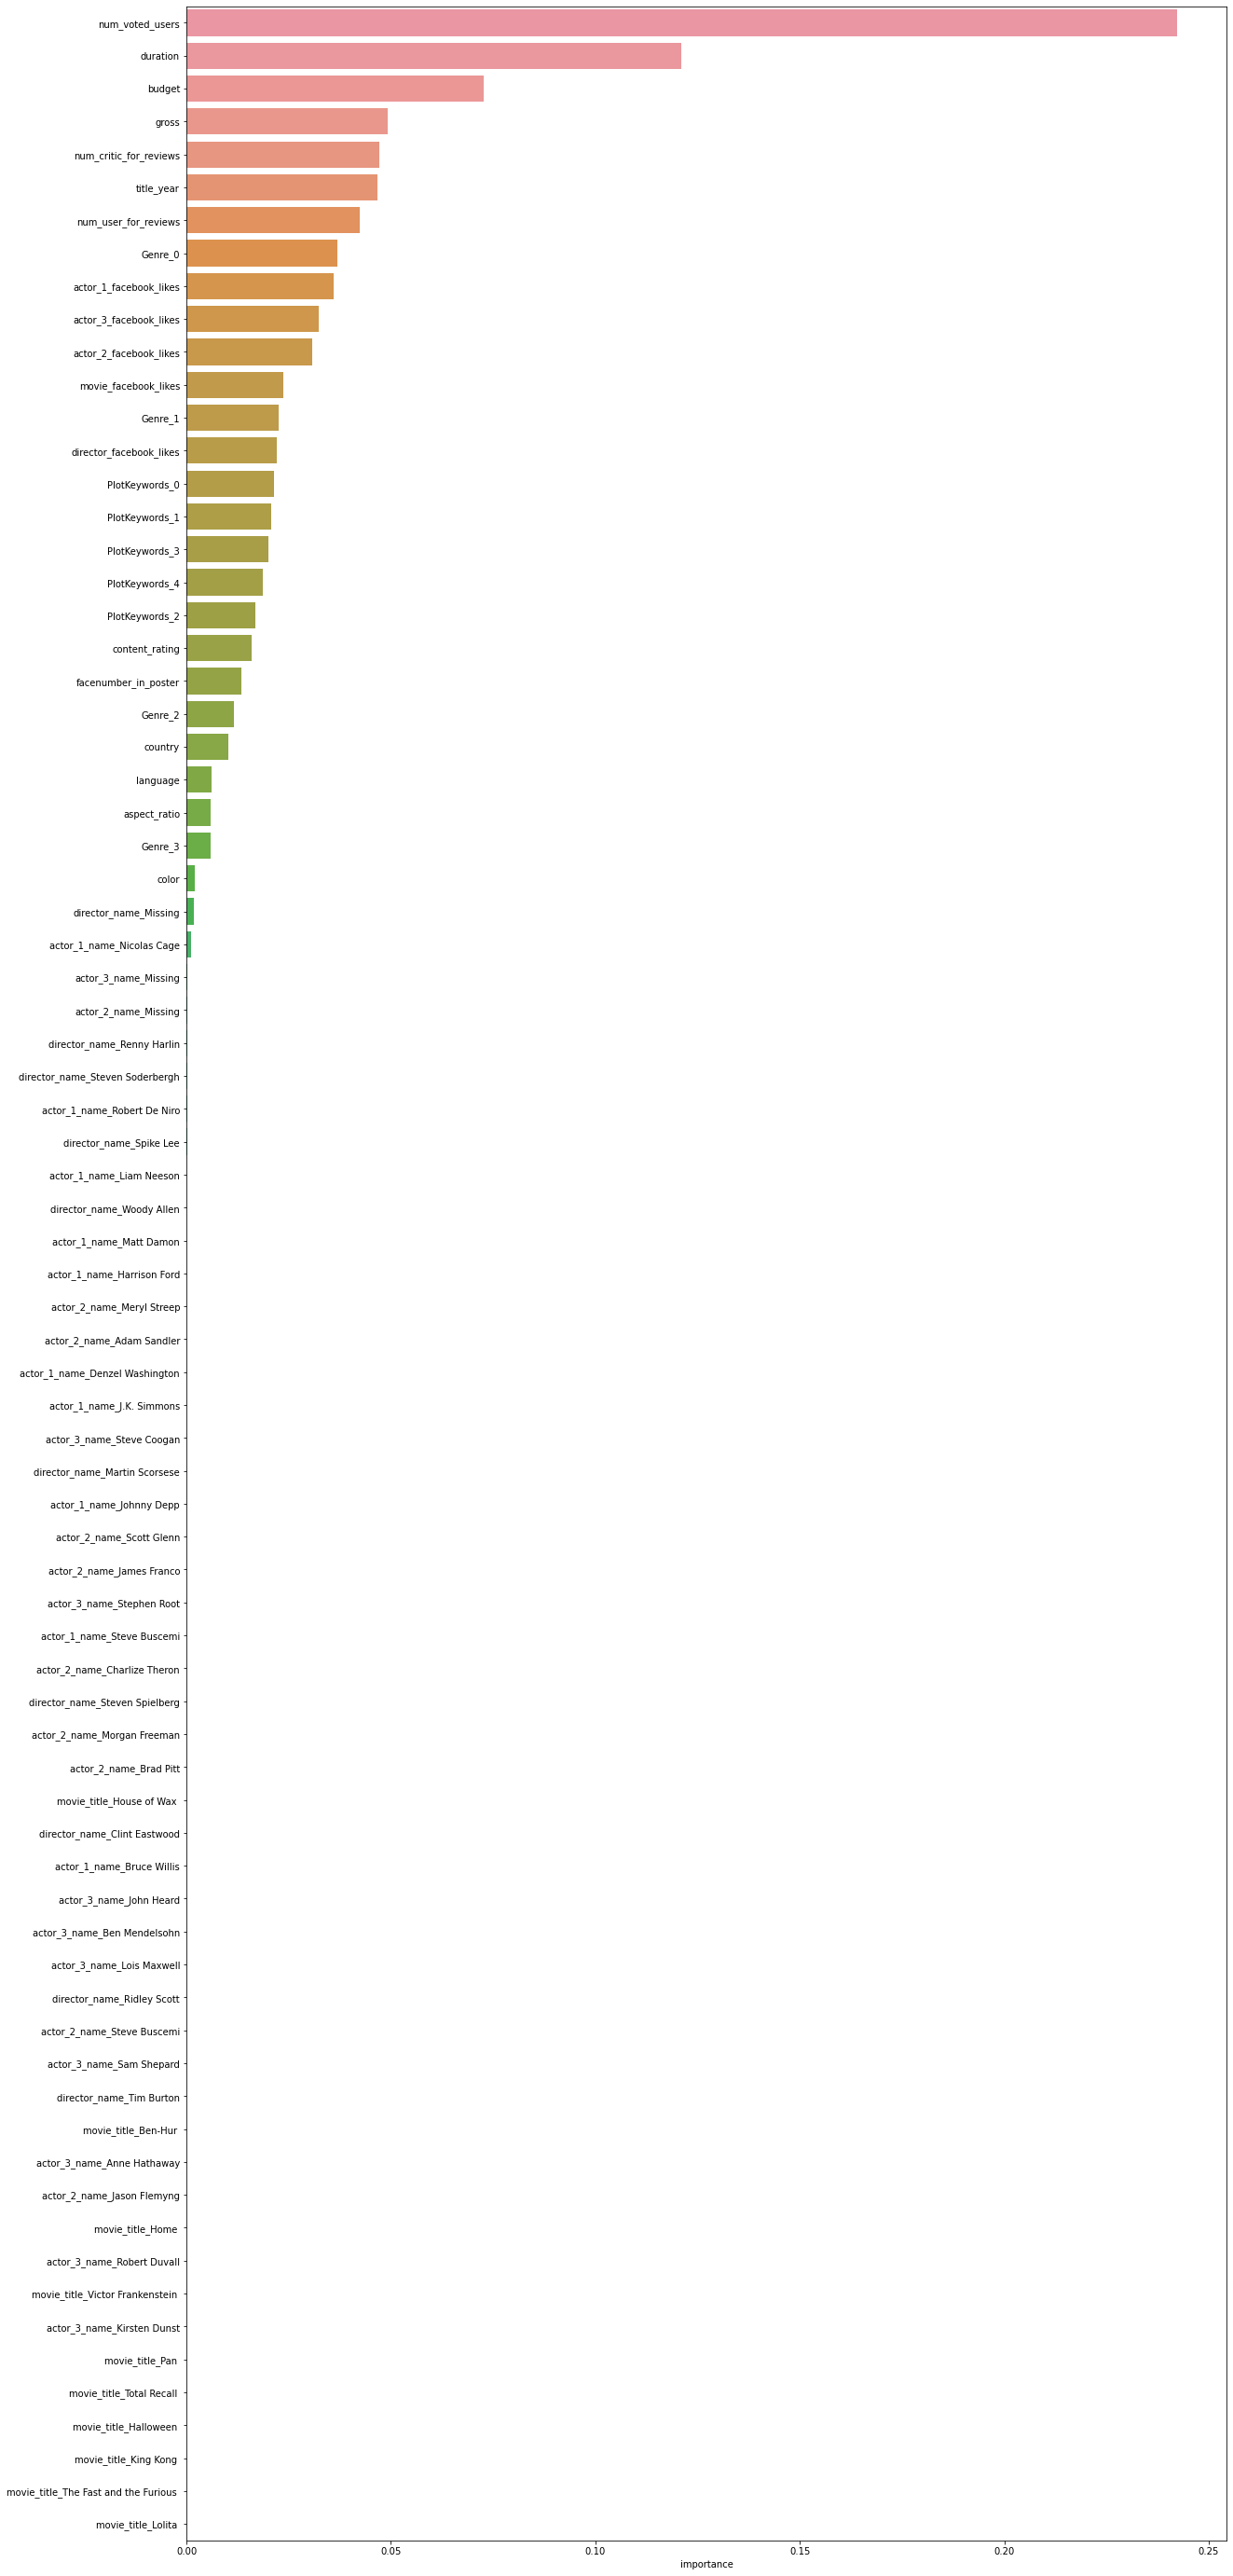

In [91]:
df = pd.DataFrame(data = dt.feature_importances_,index = x_train.columns.tolist())

df = df[df.iloc[:,0] > 0].sort_values(by = 0,ascending = False)
fig, ax = plt.subplots(figsize=(20,50))
sns.barplot(y = df.index, x= df[0])
plt.xlabel('importance')

From above graph it is seen that many column doesn't have any importance or have -ve importance. So we'll remove all those columns

In [112]:
# Select the columns which have more importance as shown in the diagram

x1 = x[['num_voted_users', 'duration', 'budget', 'gross', 'num_critic_for_reviews','title_year',
 'num_user_for_reviews', 'Genre_0', 'actor_1_facebook_likes', 'actor_3_facebook_likes', 
'actor_2_facebook_likes', 'movie_facebook_likes', 
'Genre_1', 'director_facebook_likes', 'PlotKeywords_0', 'PlotKeywords_1', 'PlotKeywords_3', 
'PlotKeywords_4', 'PlotKeywords_2', 'content_rating', 'facenumber_in_poster', 'Genre_2', 
'country', 'language', 'aspect_ratio', 'Genre_3', 'color', 'director_name_Missing', 
'actor_1_name_Nicolas Cage']]

In [115]:
x1.shape

(5043, 29)

In [116]:
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=0)

In [117]:
from sklearn.ensemble import RandomForestRegressor
dt = RandomForestRegressor(n_estimators = 1000,n_jobs=-1,random_state = 0)
dt.fit(x_train, y_train)
dt_score_train = dt.score(x_train, y_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(x_test, y_test)
print("Testing score: ",dt_score_test)

Training score:  0.9354845871800368
Testing score:  0.5327933283304611
